In [22]:
import pandas as pd
df = pd.read_csv('Indore.csv')

In [23]:
def determine_season(row):
    dbt = row['DBT mean']
    rh = row['RH mean']
    # drsr = row['DrSR[Wh/m2]']
    # dfsr = row['DfSR [Wh/m2]']
    cloud_cover = row['Sky Cover mean']
    # month = row['Month']
    ghi = row['GHR mean']
    
    
    if dbt <= 23 and rh >= 40 and ghi <= 255:
        season = 'Winter'
    elif 22 < dbt <= 28 and rh <= 40 and 260 < ghi < 320:
        season = 'Spring'
    elif dbt > 28 and rh < 80 and ghi > 300:
        season = 'Summer'
    elif 26 < dbt < 30 and rh >=70  and ghi < 300 and cloud_cover > 4:
        season = 'Light Rainfall'
    elif 23 < dbt < 29 and rh >= 75 and ghi < 300 and cloud_cover > 6:
        season = 'Monsoon'
    elif 23 < dbt <= 27.5 and rh < 80 and ghi < 270 and cloud_cover < 6:
        season = 'Autumn'
    else:
        season = 'Unknown'

    return season
df['season'] = df.apply(determine_season, axis=1)

In [24]:
# daily_season = df.groupby(['Month.1', 'Day.1'])['season'].agg(lambda x: x.value_counts().index[0]).reset_index()


# df = df.merge(daily_season, on=['Month.1', 'Day.1'], suffixes=('', '_Daily'))

# df.to_excel('IndoreSeason.xlsx')




# print(df)

In [25]:
# Define a function to replace 'Unknown' with the most frequent surrounding season
def replace_unknown_with_mode(df, window_size=3):
    seasons = df['season'].values
    for i in range(len(seasons)):
        if seasons[i] == 'Unknown':
            # Determine the window bounds
            start = max(0, i - window_size)
            end = min(len(seasons), i + window_size + 1)
            # Get the surrounding seasons
            surrounding_seasons = seasons[start:end]
            # Find the most common season in the surrounding window, ignoring 'Unknown'
            most_common_season = pd.Series([season for season in surrounding_seasons if season != 'Unknown']).mode()
            if not most_common_season.empty:
                seasons[i] = most_common_season[0]
    df['season'] = seasons
    return df

# Replace 'Unknown' seasons with the most frequent surrounding season
df = replace_unknown_with_mode(df)

df.to_excel('IndoreSeason.xlsx')

# Optional: you can verify the changes
print(df.head())

   Year  Month  Day  Hour   DBT  RH  DrSR[Wh/m2]  DfSR [Wh/m2]  \
0  2002      1    1     1  17.4  68            0             0   
1  2002      1    1     2  17.8  71            0             0   
2  2002      1    1     3  17.4  69            0             0   
3  2002      1    1     4  16.4  72            0             0   
4  2002      1    1     5  10.4  70            0             0   

   Wind Direction [degrees]  Wind Speed [m/s]  ...  \
0                       102               0.8  ...   
1                         0               0.0  ...   
2                         0               0.0  ...   
3                         0               0.0  ...   
4                       315               3.9  ...   

   Global Horizontal Radiation [Wh/m2]  Month.1  Day.1  DBT min  DBT max  \
0                                    0      1.0    1.0      9.6     22.1   
1                                    0      1.0    2.0      7.5     21.8   
2                                    0      1.0   

In [1]:
import pandas as pd
df = pd.read_csv('Moderate.csv')

In [5]:
def determine_season(row):
    hdbt = row['hDBT_mean']
    bdbt = row['bDBT_mean']
    wdbt = row['wDBT_mean']
    hrh = row['hRH_mean']
    brh = row['bRH_mean']
    wrh = row['wRH_mean']
    # drsr = row['DrSR[Wh/m2]']
    # dfsr = row['DfSR [Wh/m2]']
    hsc = row['hSC_mean']
    bsc = row['bSC_mean']
    wsc = row['wSC_mean']
    # month = row['Month']
    hghi = row['hGHR_mean']
    bghi = row['bGHR_mean']
    wghi = row['wGHR_mean']
    
    
    if all([hdbt <= 23, bdbt <= 23, wdbt <= 23]) and all([hrh >= 40, brh >= 40, wrh >= 40]) and all([hghi <= 255, bghi <= 255, wghi <= 255]):
        season = 'Winter'
    elif all([22 < hdbt <= 28, 22 < bdbt <= 28, 22 < wdbt <= 28]) and all([hrh <= 40, brh <= 40, wrh <= 40]) and all([260 < hghi < 320, 260 < bghi < 320, 260 < wghi < 320]):
        season = 'Spring'
    elif all([hdbt > 28, bdbt > 28, wdbt > 28]) and all([hrh < 80, brh < 80, wrh < 80]) and all([hghi > 300, bghi > 300, wghi > 300]):
        season = 'Summer'
    elif all([26 < hdbt < 30, 26 < bdbt < 30, 26 < wdbt < 30]) and all([hrh >= 70, brh >= 70, wrh >= 70]) and all([hghi < 300, bghi < 300, wghi < 300]) and all([hsc > 4, bsc > 4, wsc > 4]):
        season = 'Light Rainfall'
    elif all([23 < hdbt < 29, 23 < bdbt < 29, 23 < wdbt < 29]) and all([hrh >= 75, brh >= 75, wrh >= 75]) and all([hghi < 300, bghi < 300, wghi < 300]) and all([hsc > 6, bsc > 6, wsc > 6]):
        season = 'Monsoon'
    elif all([23 < hdbt <= 27.5, 23 < bdbt <= 27.5, 23 < wdbt <= 27.5]) and all([hrh < 80, brh < 80, wrh < 80]) and all([hghi < 270, bghi < 270, wghi < 270]) and all([hsc < 6, bsc < 6, wsc < 6]):
        season = 'Autumn'
    elif all([23 < hdbt <= 27.5, 23 < bdbt <= 27.5, 23 < wdbt <= 27.5]) and all([60 <= hrh < 75, 60 <= brh < 75, 60 <= wrh < 75]) and all([hghi < 270, bghi < 270, wghi < 270]) and all([hsc < 6, bsc < 6, wsc < 6]):
        season = 'Transitional Period'
    else:
        season = 'Unknown'

    return season
df['season'] = df.apply(determine_season, axis=1)

In [6]:
# Define a function to replace 'Unknown' with the most frequent surrounding season
def replace_unknown_with_mode(df, window_size=3):
    seasons = df['season'].values
    for i in range(len(seasons)):
        if seasons[i] == 'Unknown':
            # Determine the window bounds
            start = max(0, i - window_size)
            end = min(len(seasons), i + window_size + 1)
            # Get the surrounding seasons
            surrounding_seasons = seasons[start:end]
            # Find the most common season in the surrounding window, ignoring 'Unknown'
            most_common_season = pd.Series([season for season in surrounding_seasons if season != 'Unknown']).mode()
            if not most_common_season.empty:
                seasons[i] = most_common_season[0]
    df['season'] = seasons
    return df

# Replace 'Unknown' seasons with the most frequent surrounding season
df = replace_unknown_with_mode(df)

df.to_excel('ModerateSeason.xlsx')

print(df.head())

   hDBT_mean  bDBT_mean  wDBT_mean   hRH_mean   bRH_mean   wRH_mean  \
0  25.287500  23.720833  25.550000  68.791667  65.250000  68.458333   
1  23.762500  21.845833  24.404167  62.541667  65.208333  61.958333   
2  24.037500  21.945833  24.650000  54.000000  61.625000  54.500000   
3  23.529167  21.629167  24.154167  53.375000  61.708333  53.458333   
4  23.362500  21.379167  24.016667  55.541667  62.291667  55.375000   

    hGHR_mean   bGHR_mean   wGHR_mean  hSC_mean  bSC_mean  wSC_mean   season  
0  101.458333  265.541667  100.750000  9.625000  0.000000  9.625000  Unknown  
1  173.625000  266.666667  181.500000  6.250000  0.000000  6.375000  Unknown  
2  229.458333  266.166667  218.625000  2.166667  0.000000  2.416667  Unknown  
3  214.041667  210.250000  215.916667  1.500000  4.541667  1.833333  Unknown  
4  205.541667  261.458333  207.666667  2.041667  0.875000  1.541667  Unknown  


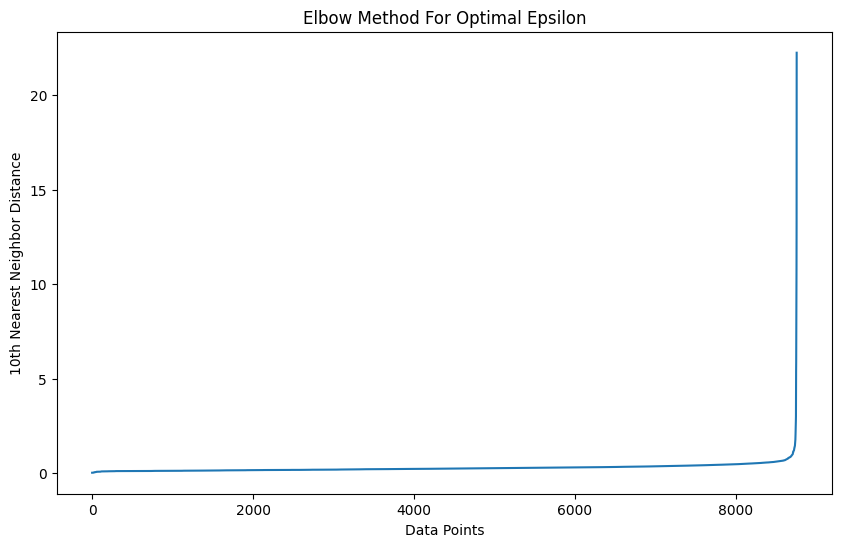

KeyboardInterrupt: 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru raw data.xlsx'
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
# Select relevant columns (adjust column names as necessary)
columns = ['Dry Bulb Temperature', 'Relative Humidity', 'Total Sky Cover', 'Liquid Precipitation Depth', 'Global Horizontal Radiation']
data = data[columns].dropna()

# Step 3: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Determine the best epsilon value
# Compute the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=11)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort the distances to find the elbow point
distances = np.sort(distances[:, 10], axis=0)

# Plot the distances to visualize the elbow point
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method For Optimal Epsilon')
plt.xlabel('Data Points')
plt.ylabel('10th Nearest Neighbor Distance')
plt.show()

# Helper function to perform DBSCAN and check clusters
def perform_dbscan(scaled_data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    unique_labels = set(labels)
    clusters = {label: np.where(labels == label)[0] for label in unique_labels if label != -1}
    return labels, clusters

# Step 5: Cluster the data using DBSCAN
min_samples = 1300
initial_eps = distances[np.argmax(np.diff(distances))]

# Iteratively adjust eps to get at least 3 clusters with min_samples condition
eps = initial_eps
labels, clusters = perform_dbscan(scaled_data, eps, min_samples)
while len(clusters) < 3:
    eps += 0.01  # Adjust increment as needed
    labels, clusters = perform_dbscan(scaled_data, eps, min_samples)

# Step 6: Label the clusters
# Create a new column for cluster labels
data['cluster'] = labels

# Label noise as 'noise' and other clusters as 'group1', 'group2', etc.
data['cluster'] = data['cluster'].apply(lambda x: 'noise' if x == -1 else f'group{x+1}')

# Save the clustered data to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru_clustered_data.xlsx'
data.to_excel(output_file_path, index=False)

# Output the path to the clustered data file
output_file_path


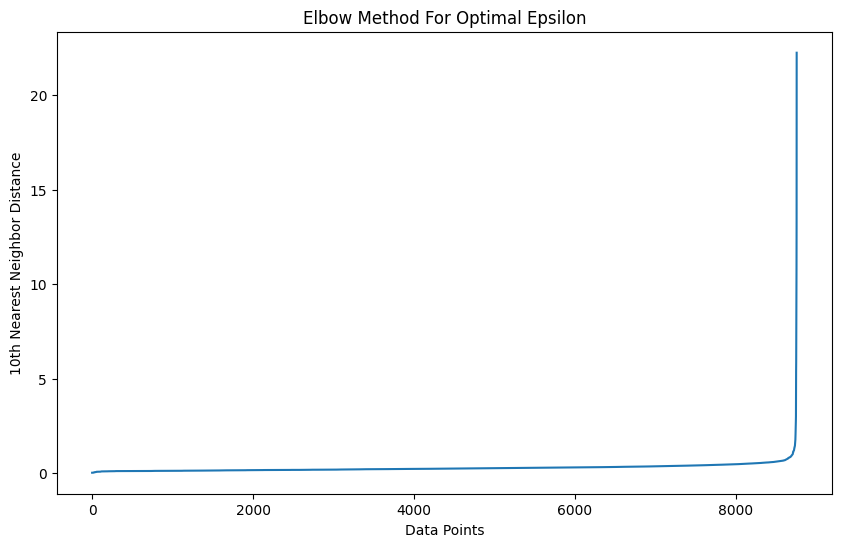

Initial estimated epsilon: 13.312225718430582
Trying eps: 13.312225718430582, Number of clusters found: 1
Trying eps: 13.322225718430582, Number of clusters found: 1
Trying eps: 13.332225718430582, Number of clusters found: 1
Trying eps: 13.342225718430582, Number of clusters found: 1
Trying eps: 13.352225718430581, Number of clusters found: 1
Trying eps: 13.362225718430581, Number of clusters found: 1
Trying eps: 13.372225718430581, Number of clusters found: 1
Trying eps: 13.38222571843058, Number of clusters found: 1
Trying eps: 13.39222571843058, Number of clusters found: 1
Trying eps: 13.40222571843058, Number of clusters found: 1
Trying eps: 13.41222571843058, Number of clusters found: 1
Trying eps: 13.42222571843058, Number of clusters found: 1
Trying eps: 13.43222571843058, Number of clusters found: 1
Trying eps: 13.44222571843058, Number of clusters found: 1
Trying eps: 13.45222571843058, Number of clusters found: 1
Trying eps: 13.46222571843058, Number of clusters found: 1
Try

PermissionError: [Errno 13] Permission denied: 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru_clustered_data.xlsx'

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru raw data.xlsx'
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
# Select relevant columns (adjust column names as necessary)
columns = ['Dry Bulb Temperature', 'Relative Humidity', 'Total Sky Cover', 'Liquid Precipitation Depth', 'Global Horizontal Radiation']
data = data[columns].dropna()

# Step 3: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Determine the best epsilon value
# Compute the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=11)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort the distances to find the elbow point
distances = np.sort(distances[:, 10], axis=0)

# Plot the distances to visualize the elbow point
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method For Optimal Epsilon')
plt.xlabel('Data Points')
plt.ylabel('10th Nearest Neighbor Distance')
plt.show()

# Helper function to perform DBSCAN and check clusters
def perform_dbscan(scaled_data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    unique_labels = set(labels)
    clusters = {label: np.where(labels == label)[0] for label in unique_labels if label != -1}
    return labels, clusters

# Step 5: Cluster the data using DBSCAN
min_samples = 1300
initial_eps = distances[np.argmax(np.diff(distances))]

# Log the initial epsilon value
print(f"Initial estimated epsilon: {initial_eps}")

# Limit the epsilon adjustment range and step size
eps_range = np.arange(initial_eps, initial_eps + 0.5, 0.01)

# Iteratively adjust eps to get at least 3 clusters with min_samples condition
for eps in eps_range:
    labels, clusters = perform_dbscan(scaled_data, eps, min_samples)
    num_clusters = len(clusters)
    print(f"Trying eps: {eps}, Number of clusters found: {num_clusters}")
    if num_clusters >= 3:
        break

# Step 6: Label the clusters
# Create a new column for cluster labels
data['cluster'] = labels

# Label noise as 'noise' and other clusters as 'group1', 'group2', etc.
data['cluster'] = data['cluster'].apply(lambda x: 'noise' if x == -1 else f'group{x+1}')

# Save the clustered data to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru_clustered_data.xlsx'
data.to_excel(output_file_path, index=False)

# Output the path to the clustered data file
print(f"Clustered data saved to: {output_file_path}")


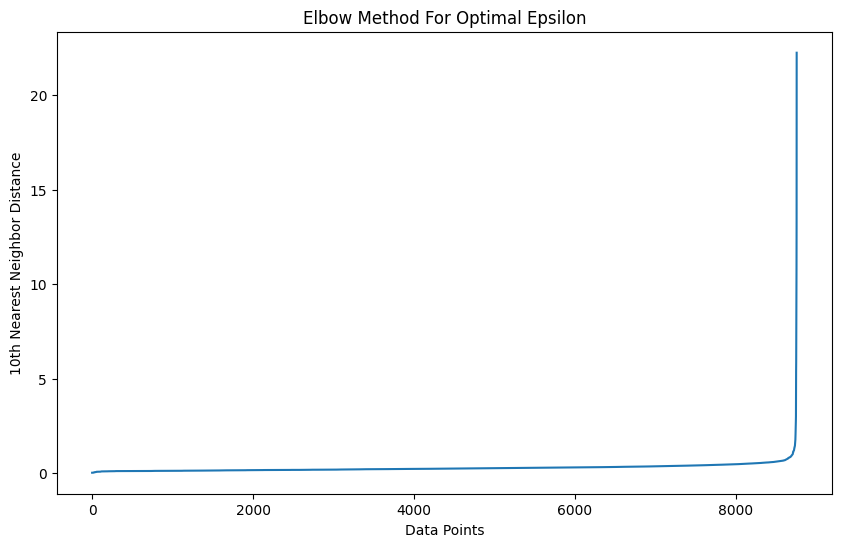

Initial estimated epsilon: 13.312225718430582
Trying eps: 13.312225718430582, Number of clusters found: 1
Trying eps: 13.322225718430582, Number of clusters found: 1
Trying eps: 13.332225718430582, Number of clusters found: 1
Trying eps: 13.342225718430582, Number of clusters found: 1
Trying eps: 13.352225718430581, Number of clusters found: 1
Trying eps: 13.362225718430581, Number of clusters found: 1
Trying eps: 13.372225718430581, Number of clusters found: 1
Trying eps: 13.38222571843058, Number of clusters found: 1
Trying eps: 13.39222571843058, Number of clusters found: 1
Trying eps: 13.40222571843058, Number of clusters found: 1
Trying eps: 13.41222571843058, Number of clusters found: 1
Trying eps: 13.42222571843058, Number of clusters found: 1
Trying eps: 13.43222571843058, Number of clusters found: 1
Trying eps: 13.44222571843058, Number of clusters found: 1
Trying eps: 13.45222571843058, Number of clusters found: 1
Trying eps: 13.46222571843058, Number of clusters found: 1
Try

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru raw data.xlsx'
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
# Select relevant columns (adjust column names as necessary)
columns = ['Dry Bulb Temperature', 'Relative Humidity', 'Total Sky Cover', 'Liquid Precipitation Depth', 'Global Horizontal Radiation']
data = data[columns].dropna()

# Step 3: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Determine the best epsilon value
# Compute the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=11)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort the distances to find the elbow point
distances = np.sort(distances[:, 10], axis=0)

# Plot the distances to visualize the elbow point
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method For Optimal Epsilon')
plt.xlabel('Data Points')
plt.ylabel('10th Nearest Neighbor Distance')
plt.show()

# Helper function to perform DBSCAN and check clusters
def perform_dbscan(scaled_data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    unique_labels = set(labels)
    clusters = {label: np.where(labels == label)[0] for label in unique_labels if label != -1}
    return labels, clusters

# Step 5: Cluster the data using DBSCAN
min_samples = 1300
initial_eps = distances[np.argmax(np.diff(distances))]

# Log the initial epsilon value
print(f"Initial estimated epsilon: {initial_eps}")

# Limit the epsilon adjustment range and step size
eps_range = np.arange(initial_eps, initial_eps + 1, 0.01)

# Iteratively adjust eps to get at least 3 clusters with min_samples condition
for eps in eps_range:
    labels, clusters = perform_dbscan(scaled_data, eps, min_samples)
    num_clusters = len(clusters)
    print(f"Trying eps: {eps}, Number of clusters found: {num_clusters}")
    if num_clusters >= 3:
        break

# Step 6: Label the clusters
# Create a new column for cluster labels
data['cluster'] = labels

# Label noise as 'noise' and other clusters as 'group1', 'group2', etc.
data['cluster'] = data['cluster'].apply(lambda x: 'noise' if x == -1 else f'group{x+1}')

# Save the clustered data to a new Excel file with a different name or path
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru_clustered_data_new2.xlsx'
data.to_excel(output_file_path, index=False)

# Output the path to the clustered data file
print(f"Clustered data saved to: {output_file_path}")


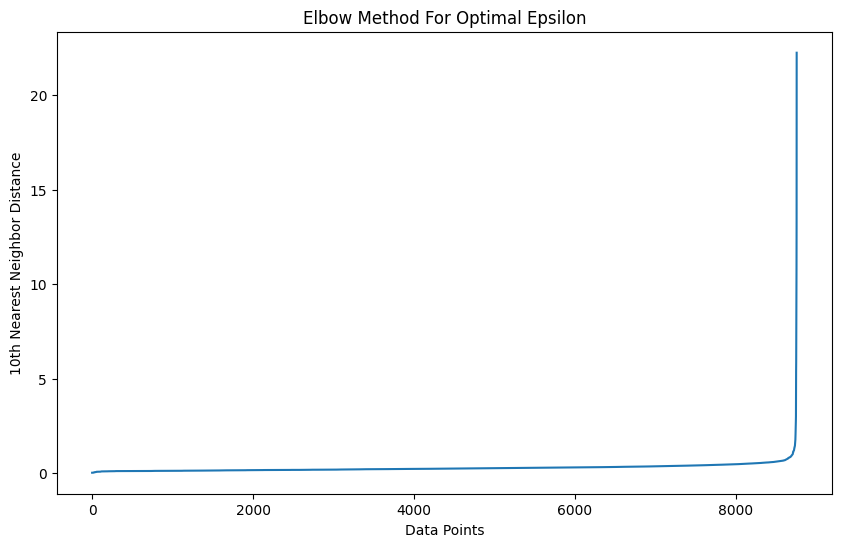

Initial estimated epsilon: 13.312225718430582
Trying eps: 12.812225718430582, Number of clusters found: 1
Trying eps: 12.862225718430583, Number of clusters found: 1
Trying eps: 12.912225718430584, Number of clusters found: 1
Trying eps: 12.962225718430584, Number of clusters found: 1
Trying eps: 13.012225718430585, Number of clusters found: 1
Trying eps: 13.062225718430586, Number of clusters found: 1
Trying eps: 13.112225718430587, Number of clusters found: 1
Trying eps: 13.162225718430587, Number of clusters found: 1
Trying eps: 13.212225718430588, Number of clusters found: 1
Trying eps: 13.262225718430589, Number of clusters found: 1
Trying eps: 13.31222571843059, Number of clusters found: 1
Trying eps: 13.36222571843059, Number of clusters found: 1
Trying eps: 13.41222571843059, Number of clusters found: 1
Trying eps: 13.462225718430592, Number of clusters found: 1
Trying eps: 13.512225718430592, Number of clusters found: 1
Trying eps: 13.562225718430593, Number of clusters found:

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru raw data.xlsx'
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
# Select relevant columns (adjust column names as necessary)
columns = ['Dry Bulb Temperature', 'Relative Humidity', 'Total Sky Cover', 'Liquid Precipitation Depth', 'Global Horizontal Radiation']
data = data[columns].dropna()

# Step 3: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Determine the best epsilon value
# Compute the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=11)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort the distances to find the elbow point
distances = np.sort(distances[:, 10], axis=0)

# Plot the distances to visualize the elbow point
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method For Optimal Epsilon')
plt.xlabel('Data Points')
plt.ylabel('10th Nearest Neighbor Distance')
plt.show()

# Helper function to perform DBSCAN and check clusters
def perform_dbscan(scaled_data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    unique_labels = set(labels)
    clusters = {label: np.where(labels == label)[0] for label in unique_labels if label != -1}
    return labels, clusters

# Step 5: Cluster the data using DBSCAN
min_samples = 50  # Adjusted min_samples value

initial_eps = distances[np.argmax(np.diff(distances))]

# Log the initial epsilon value
print(f"Initial estimated epsilon: {initial_eps}")

# Expand the epsilon adjustment range and step size
eps_range = np.arange(initial_eps - 0.5, initial_eps + 0.5, 0.05)

found_clusters = False

# Iteratively adjust eps to get at least 3 clusters with min_samples condition
for eps in eps_range:
    labels, clusters = perform_dbscan(scaled_data, eps, min_samples)
    num_clusters = len(clusters)
    print(f"Trying eps: {eps}, Number of clusters found: {num_clusters}")
    if num_clusters >= 3:
        found_clusters = True
        break

if not found_clusters:
    print("Could not find at least 3 clusters within the specified range.")

# Step 6: Label the clusters
# Create a new column for cluster labels
data['cluster'] = labels

# Label noise as 'noise' and other clusters as 'group1', 'group2', etc.
data['cluster'] = data['cluster'].apply(lambda x: 'noise' if x == -1 else f'group{x+1}')

# Save the clustered data to a new Excel file with a different name or path
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru_clustered_data_new2.xlsx'
data.to_excel(output_file_path, index=False)

# Output the path to the clustered data file
print(f"Clustered data saved to: {output_file_path}")
